## import numpy as np
import tensorflow as tf
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.datasets import load_iris, load_breast_cancer, load_diabetes, load_boston, make_regression

In [2]:
#load data
X,Y = make_regression(n_samples = 500, n_features=1, noise=20.0);
num_samples = X.shape[0];


In [3]:
#create graph

input_layer = tf.placeholder(tf.float32, shape=[1], name='input');

weights = tf.get_variable('weights', shape=[1]);

bias = tf.get_variable('bias', shape=[1]);

output = tf.reduce_sum(weights*input_layer)+bias;


In [4]:
# create loss function (squared error)

y_ = tf.placeholder(tf.float32, name='target')

loss = (output-y_);
loss = loss*loss;


In [5]:
# instantiate optimizer
learning_rate = 0.005;
gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate);
train_step = gd_optimizer.minimize(loss)


In [6]:
# instantiate initializer

init = tf.global_variables_initializer()


<IPython.core.display.Javascript object>


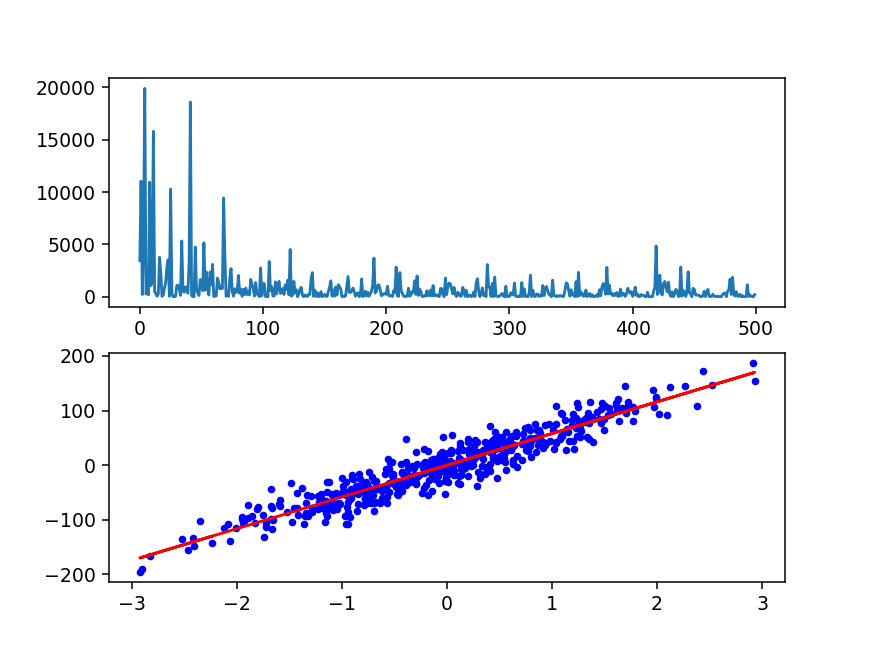

In [7]:
# prepare visualization
losses = [];
    
fig = plt.figure()
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.ion()
fig.show()
fig.canvas.draw()

In [8]:
# start session to feed graph with data
with tf.Session() as sess:
    
    # run instantiater
    sess.run(init)

    # iterate through all samples
    for i in range(0, num_samples):
        
            # reshape if necessary
            feature_vec = X[i];
            feature_vec = np.reshape(feature_vec,[1]);

            # get target output
            target_vec = Y[i];

            # run training step of optimizer
            # also need to feed graph with input and target
            # (for visualization we also want to see current loss, weight and bias)
            _, loss_value, weights_eval, bias_eval = sess.run([train_step, loss, weights, bias], 
                                                                feed_dict={'input:0' : feature_vec,
                                                                           'target:0': target_vec});
            
            losses.append(loss_value);
            

            # visualize loss
            ax.clear()
            ax.plot(losses)
            
            
            # visualize current line in point cloud
            ax2.clear()
            ax2.plot(X,Y, 'b.')
            ax2.plot(X,weights_eval*X+bias_eval, 'r')
            fig.canvas.draw()


    
    
    
    
    